In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as patches
import sys
sys.path.append('..')
from utilis.clustering import *

### Kmean with IoU metric

In [2]:
# Path to the train dataset labels folder
label_dir = "../data/resized_train/labels"

# Initialize a list to store normalized widths and heights
train_wh = []

# Iterate through all label files
for label_file in os.listdir(label_dir):
    if label_file.endswith(".txt"):
        with open(os.path.join(label_dir, label_file), "r") as f:
            for line in f:
                # Parse the line: class_id, x_center, y_center, width, height
                class_id, x_center, y_center, width, height = map(float, line.split())
                train_wh.append([width, height])  # Store normalized width and height

# Convert to a NumPy array
train_wh = np.array(train_wh)

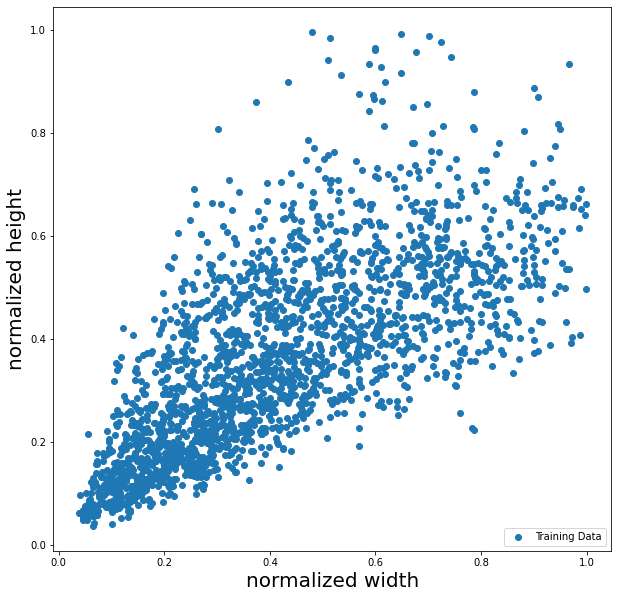

In [3]:
# Plot the training data
plt.figure(figsize=(10, 10))
plt.scatter(train_wh[:, 0], train_wh[:, 1], label="Training Data")
plt.xlabel("normalized width",fontsize=20)
plt.ylabel("normalized height",fontsize=20)
plt.legend(loc="lower right")
plt.show()

In [4]:
# Run k-means for k = 2 to 10
kmax = 11
results = {}

for k in range(2, kmax):
    clusters, nearest_clusters, distances = kmeans(train_wh, k)
    within_cluster_mean_distances = np.mean(distances[np.arange(distances.shape[0]), nearest_clusters])
    results[k] = {
        "clusters": clusters,
        "nearest_clusters": nearest_clusters,
        "distances": distances,
        "within_cluster_mean_distances": within_cluster_mean_distances,
    }
    print(f"{k:2} clusters: mean IoU = {1 - within_cluster_mean_distances:.4f}")

 2 clusters: mean IoU = 0.5812
 3 clusters: mean IoU = 0.6482
 4 clusters: mean IoU = 0.6742
 5 clusters: mean IoU = 0.6989
 6 clusters: mean IoU = 0.7191
 7 clusters: mean IoU = 0.7353
 8 clusters: mean IoU = 0.7451
 9 clusters: mean IoU = 0.7576
10 clusters: mean IoU = 0.7694


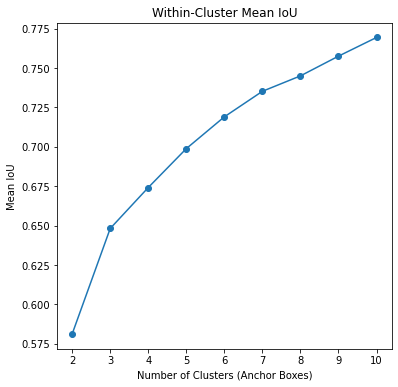

In [5]:
# Plot the elbow curve
plt.figure(figsize=(6, 6))
plt.plot(
    range(2, kmax),
    [1 - results[k]["within_cluster_mean_distances"] for k in range(2, kmax)],
    "o-",
)
plt.title("Within-Cluster Mean IoU")
plt.ylabel("Mean IoU")
plt.xlabel("Number of Clusters (Anchor Boxes)")
plt.show()

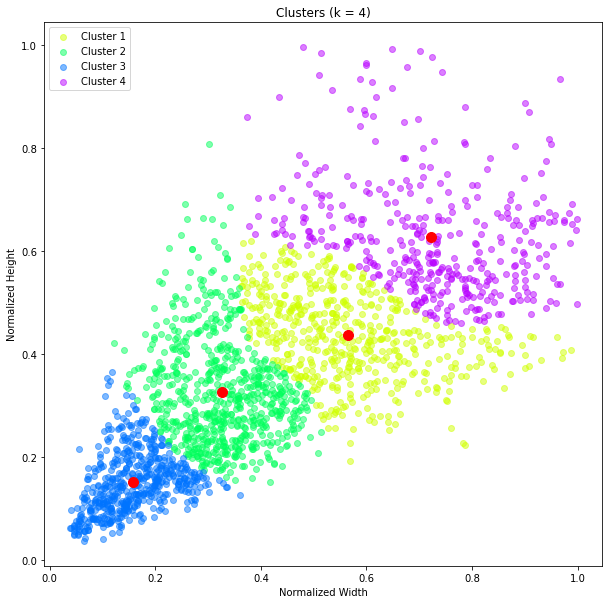

In [6]:
def plot_clusters(clusters, nearest_clusters, wh, k):
    """
    Plot the clusters and their bounding boxes.

    Args:
        clusters (np.ndarray): A 2D array of shape (k, 2) containing the cluster centers (anchor box dimensions).
        nearest_clusters (np.ndarray): A 1D array of shape (n,) indicating the index of the nearest cluster for each box.
        wh (np.ndarray): A 2D array of shape (n, 2) containing the normalized width and height of n bounding boxes.
        k (int): The number of clusters (anchor boxes) used in k-means clustering.

    Returns:
        None: Displays the plot showing the clusters and their bounding boxes.
    """
    plt.figure(figsize=(10, 10))
    colors = sns.color_palette("hsv", k)
    for i in range(k):
        plt.scatter(
            wh[nearest_clusters == i, 0],
            wh[nearest_clusters == i, 1],
            color=colors[i],
            alpha=0.5,
            label=f"Cluster {i+1}",
        )
        plt.scatter(clusters[i, 0], clusters[i, 1], color="red", marker="o", s=100)
    plt.title(f"Clusters (k = {k})")
    plt.xlabel("Normalized Width")
    plt.ylabel("Normalized Height")
    plt.legend()
    plt.show()

k = 4
plot_clusters(results[k]["clusters"], results[k]["nearest_clusters"], train_wh, k)

In [7]:
nbr_of_anchors = 4
anchor_boxes = results[nbr_of_anchors]["clusters"]
print("Normalised anchor Boxes (width, height):")
print(anchor_boxes)

Normalised anchor Boxes (width, height):
[[0.56543644 0.43573397]
 [0.32582974 0.32626539]
 [0.15752303 0.15084553]
 [0.72250432 0.62789971]]


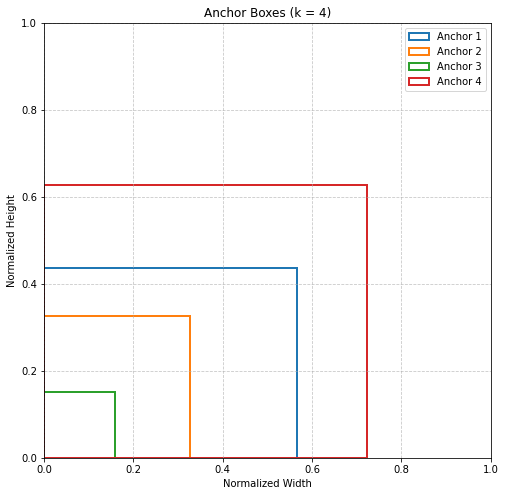

In [8]:
plt.figure(figsize=(8, 8))
plt.title(f"Anchor Boxes (k = {nbr_of_anchors})")
plt.xlabel("Normalized Width")
plt.ylabel("Normalized Height")

# Plot each anchor box
for i, (width, height) in enumerate(anchor_boxes):
    # Create a rectangle patch for the anchor box
    rect = patches.Rectangle(
        (0, 0), width, height, linewidth=2, edgecolor=f"C{i}", facecolor="none", label=f"Anchor {i+1}"
    )
    # Add the rectangle to the plot
    plt.gca().add_patch(rect)

plt.grid(True, linestyle="--", alpha=0.7)
plt.legend(loc="upper right")
plt.show()